<a href="https://colab.research.google.com/github/chunyuan0221/3rd-ML100days/blob/master/Day_099_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [0]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [3]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


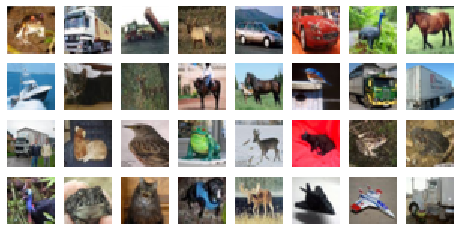

In [4]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [0]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)

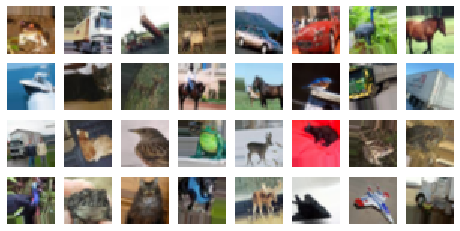

In [0]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

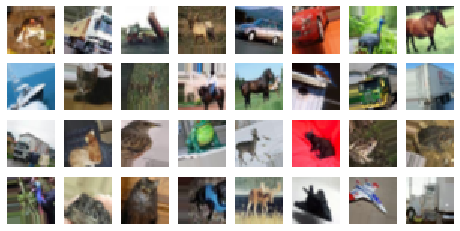

In [0]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [1]:
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Conv2D, Flatten, Activation, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras import utils
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Using TensorFlow backend.


In [0]:
#定義參數
num_classes = 10
EPOCHS = 10
BATCH_SIZE = 128
MOMENTUM = 0.9
LR = 0.01

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

In [5]:
'''
model = create_model()
opt = keras.optimizers.SGD(lr=LR, momentum=MOMENTUM, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
'''
model = create_model()
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 137us/step - loss: 1.6342 - acc: 0.4008 - val_loss: 1.2721 - val_acc: 0.5368
Epoch 2/10
50000/50000 [==============================] - 5s 92us/step - loss: 1.2407 - acc: 0.5548 - val_loss: 1.0908 - val_acc: 0.6180
Epoch 3/10
50000/50000 [==============================] - 4s 88us/step - loss: 1.0807 - acc: 0.6176 - val_loss: 1.0471 - val_acc: 0.6414
Epoch 4/10
50000/50000 [==============================] - 5s 91us/step - loss: 0.9695 - acc: 0.6588 - val_loss: 0.9089 - val_acc: 0.6804
Epoch 5/10
50000/50000 [==============================] - 4s 90us/step - loss: 0.8778 - acc: 0.6937 - val_loss: 0.7853 - val_acc: 0.7233
Epoch 6/10
50000/50000 [==============================] - 4s 90us/step - loss: 0.8129 - acc: 0.7130 - val_loss: 0.7441 - val_acc: 0.7385
Epoch 7/10
50000/50000 [==============================] - 5s 91us/step - loss: 0.7493 - acc: 0.7373 - val_loss: 0.7374 - val_ac

In [6]:
keras.backend.clear_session()
model = create_model()
#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

'''
opt = keras.optimizers.SGD(lr=LR, momentum=MOMENTUM, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
'''
data_generator = ImageDataGenerator(rotation_range=10,
                                    width_shift_range=0.15,
                                    height_shift_range=0.15,
                                    zoom_range=0.15,
                                    shear_range=0.15,
                                    horizontal_flip=True)

xtrain_ger = data_generator.flow(x_train, y_train, batch_size=BATCH_SIZE)

model.fit_generator(xtrain_ger,
                    steps_per_epoch=len(x_train) // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
390/390 [==============================] - 23s 58ms/step - loss: 1.7392 - acc: 0.3520 - val_loss: 1.4781 - val_acc: 0.4596
Epoch 2/10
390/390 [==============================] - 22s 57ms/step - loss: 1.4505 - acc: 0.4720 - val_loss: 1.2058 - val_acc: 0.5598
Epoch 3/10
390/390 [==============================] - 22s 58ms/step - loss: 1.3174 - acc: 0.5265 - val_loss: 1.1562 - val_acc: 0.5786
Epoch 4/10
390/390 [==============================] - 22s 57ms/step - loss: 1.2165 - acc: 0.5648 - val_loss: 1.0567 - val_acc: 0.6257
Epoch 5/10
390/390 [==============================] - 22s 57ms/step - loss: 1.1625 - acc: 0.5824 - val_loss: 1.0638 - val_acc: 0.6209
Epoch 6/10
390/390 [==============================] - 22s 57ms/step - loss: 1.1082 - acc: 0.6036 - val_loss: 0.9256 - val_acc: 0.6712
Epoch 7/10
390/390 [==============================] - 22s 57ms/step - loss: 1.0710 - acc: 0.6219 - val_loss: 1.0240 - val_acc: 0.6424
Epoch 8/10
390/390 [==============================] - 22s 58ms

In [7]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 70us/step
Test loss: 0.8042250992774963
Test accuracy: 0.7174


### Result
***
- 本次測試中，我們發現:
  1. 沒有使用ImageDataGenerator進行擬合：模型能很快地達到較好的準確率
  2. 有使用ImageDataGenerator進行擬合：相較沒使用ImageDataGenerator，模型收斂的速度慢了許多，準確率上也似乎沒有大幅改善。
- 但我們知道加大數據量可以幫助我們的模型overfitting，因此起初模型設計不夠好，就算使用ImageDataGenerator加大數據量也不會使準確率有大幅的上升。